# Matplotlibのトレーニング♨

## [目次](TableOfContents.ipynb)
- [環境準備](#環境準備)
  - [インストール](#インストール)
  - [インポート](#インポート)
  - [プロキシ設定](#プロキシ設定)
  - [jupyter上で利用するとき](#jupyter上で利用するとき)
- [表示](#表示)
  - [基本的な図](#基本的な図)
    - [画像の表示](#画像の表示)
    - [ヒストグラム](#ヒストグラム)
    - [パレート図](#パレート図)
    - [散布図](#散布図)
  - [相関関係を把握する図](#相関関係を把握する図)
    - [散布図行列](#散布図行列)
    - [ヒートマップ](#ヒートマップ)
  - [2次元プロット](#2次元のプロット)
    - [3次関数グラフ](#3次関数グラフ)
    - [3角関数グラフ](#3角関数グラフ)
  - [3次元プロット](#3次元のプロット)
    - [準備](#準備_)
    - [追加](#追加)
  
## 参考
開発基盤部会 Wiki
- Matplotlib  
https://dotnetdevelopmentinfrastructure.osscons.jp/index.php?Matplotlib

## 環境準備

### インストール

In [ ]:
!pip install numpy
!pip install pandas
!pip install openpyxl
!pip install matplotlib
!pip install seaborn

### インポート

In [2]:
import io
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

### プロキシ設定

In [4]:
import os
proxies = {
    "http": os.getenv("HTTP_PROXY"),
    "https": os.getenv("HTTPS_PROXY")
}

### jupyter上で利用するとき

In [5]:
%matplotlib inline

## 表示

### 画像の表示

#### 事前に画像ファイルを配置しておく。

In [6]:
#from matplotlib.image import imread
#img=imread('img1.jpg')
#plt.imshow(img)
#plt.show()

#### 画像ファイルをダウンロードして...

##### 画像ファイルをダウンロードして保存
必要に応じて[環境変数にプロキシ設定](#プロキシ設定)をしておくと良い。

In [7]:
url = 'https://dotnetdevelopmentinfrastructure.osscons.jp/image/pukiwiki.png'
res = requests.get(url) # , verify=False, proxies=proxies) # プロキシ
with open('img1.jpg', 'wb') as saveFile : saveFile.write(res.content)

##### ダウンロードした画像ファイルを表示

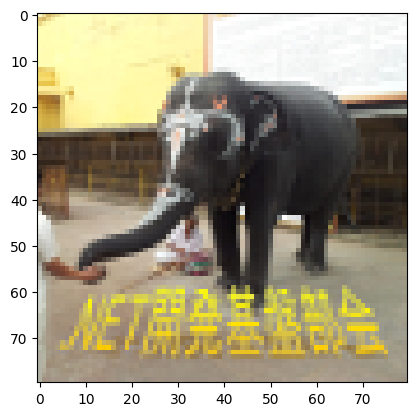

In [8]:
from matplotlib.image import imread
img=imread('img1.jpg') # io.BytesIO(res.content))
plt.imshow(img)
plt.show()

### 基本的な図 

#### ヒストグラム

##### データの生成

###### 最も単純な例

In [9]:
x = np.random.normal(70, 10, 1000) # 平均70・標準偏差10のデータ1000個
x

array([69.01763641, 72.79560136, 59.39789712, 68.02594682, 71.8928458 ,
       64.23783483, 61.9136029 , 57.07570086, 77.60725178, 91.62371228,
       74.01623629, 64.59460135, 62.35971423, 73.83225888, 67.7501145 ,
       78.49307461, 73.30185537, 67.8216777 , 74.69269185, 65.963505  ,
       68.67869242, 61.40344468, 52.94228039, 72.34058835, 73.40836627,
       82.85862032, 50.32193295, 85.33311252, 81.31981335, 71.09537461,
       65.35463226, 79.9673913 , 69.50578313, 79.9822357 , 69.51560233,
       73.59888242, 73.39341606, 75.54169671, 83.95226987, 82.24206575,
       64.71127163, 77.27441873, 45.97642284, 69.10975282, 73.10567342,
       86.28510505, 70.92334733, 65.60732996, 80.36895908, 71.03924301,
       72.18439795, 62.0583114 , 81.55926436, 68.03581559, 82.30995123,
       84.39161552, 87.594308  , 49.75664603, 63.7271048 , 75.94826001,
       89.2141866 , 51.19743204, 67.7864009 , 69.99877872, 51.75676615,
       85.19929033, 65.90418952, 70.62844356, 55.5218706 , 98.22

###### 階層別表示の例

In [10]:
y=[0,1,2]

# valのベクトルを生成し、ｎ行１列の２次元配列（行列）化
y[0]=np.random.normal(50, 10, 1000).reshape(-1, 1) # 平均50・標準偏差10のデータ1000個
y[1]=np.random.normal(150, 20, 1000).reshape(-1, 1) # 平均150・標準偏差20のデータ1000個
y[2]=np.random.normal(100, 30, 1000).reshape(-1, 1) # 平均100・標準偏差30のデータ1000個

# clsのベクトルを生成し、ｎ行１列の２次元配列（行列）化して、valとclsを結合（ｎ行２列の２次元配列（行列）
y[0]=np.hstack([y[0], np.full(1000, 0).reshape(-1, 1)])
y[1]=np.hstack([y[1], np.full(1000, 1).reshape(-1, 1)])
y[2]=np.hstack([y[2], np.full(1000, 2).reshape(-1, 1)])

# numpy.ndarray（行列）をDataFrame化
y[0]=pd.DataFrame(y[0],columns=['val','cls'])
y[1]=pd.DataFrame(y[1],columns=['val','cls'])
y[2]=pd.DataFrame(y[2],columns=['val','cls'])

# ３つのclsのDataFrameを結合
df=y[0]
df=pd.concat([df,y[1]],axis=0)
df=pd.concat([df,y[2]],axis=0)

# インデックス再設定
df.index=np.arange(len(df))

df

,val,cls
0,59.593183,0.0
1,53.965790,0.0
2,36.046399,0.0
3,51.765563,0.0
4,40.437124,0.0
...,...,...
2995,78.178825,2.0
2996,88.823981,2.0
2997,116.100238,2.0
2998,153.998133,2.0


##### データの可視化

###### 最も単純な例

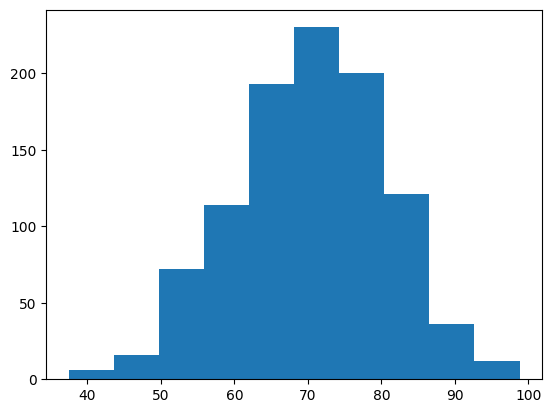

In [11]:
# binsの自動算出
plt.hist(x)
plt.show()

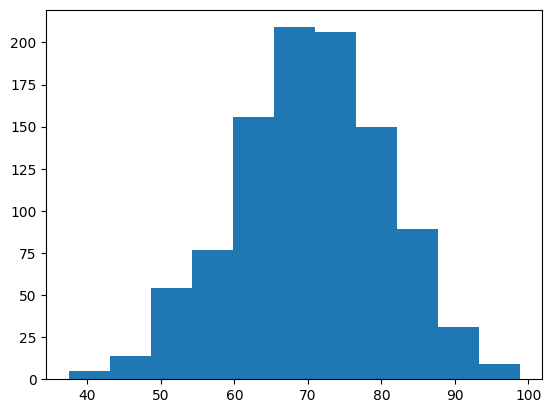

In [12]:
# 最適なbinsを算出
# - bins : ビン (表示する棒) の数
# - スタージェスの公式（1+log2n）を基に最適なbinsを算出
import math
bins = math.log(len(x), 2) + 1
plt.hist(x, bins=round(bins))
plt.show()

###### 階層別表示の例
cls列の値（階層）毎にグループ分けしてval値をヒストグラムで可視化

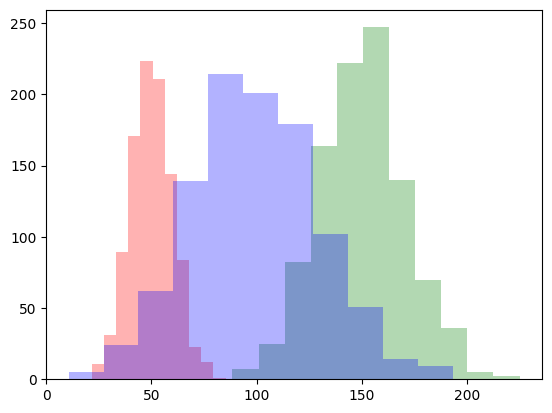

In [13]:
for _class, _color in zip([0,1,2], ['r','g','b']):
    plt.hist(df[df.cls==_class]['val'], bins=round(bins), alpha=0.3, color=_color)
plt.show()

#### パレート図
結構手数が要る。

##### データ

In [14]:
# ラベル
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
# 値
values = [100, 90, 80, 70, 60 ,50, 40, 30, 20, 10]
 
# データ操作用
df = pd.DataFrame({"label": labels, "value": values}, columns=["label", "value"])
# 「値」の降順にデータを並び替える
df = df.sort_values(by="value", ascending=False)
# 累積和を求める
df["accum"] = np.cumsum(df["value"])
# 比率の累計を求める
df["accum_percent"] = df["accum"] / sum(df["value"]) * 100
# データ数のカウント
data_num = len(df)

##### 表示

Text(0, 0.5, 'cumulative percentage')

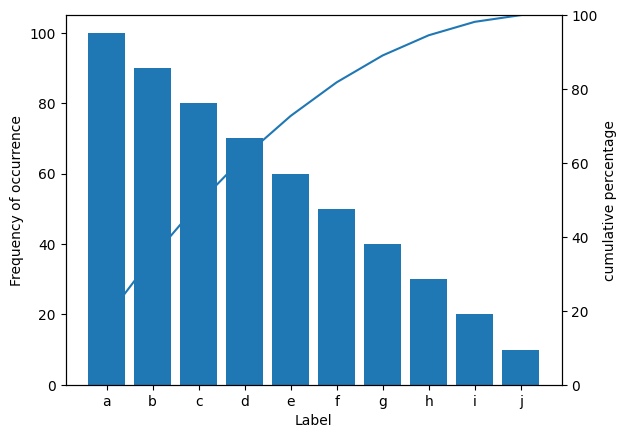

In [15]:
# グラフの土台
fig = plt.figure()

# グラフ１
# ax = fig.add_subplot(111)
ax = plt.subplot(1, 1, 1)

# グラフ２（y軸共有、x軸が右側）
ax_add = ax.twinx()
 
# 棒グラフの描画
ax.bar(range(data_num), df["value"])
ax.set_xticks(range(data_num))
ax.set_xticklabels(df["label"].tolist())
ax.set_xlabel("Label")
ax.set_ylabel("Frequency of occurrence")

# 折れ線グラフの描画
ax_add.plot(range(data_num), df["accum_percent"])
ax_add.set_ylim([0, 100])
ax_add.set_ylabel("cumulative percentage")

#### 散布図

##### データの生成
線形単回帰している風のデータを生成する。

###### データ１

In [16]:
np.random.seed(0) # 乱数生成器の状態を指定
x1=np.random.normal(50,10,100) # 平均50 標準偏差10の正規分布データ100個
y1=x1+np.random.normal(0,10,100) # 線形単回帰している風のxに対応するyの値

###### データ２
より、相関係数が大きい感じのデータ。

In [17]:
np.random.seed(0) # 乱数生成器の状態を指定
x2=np.random.normal(30,10,100) # 平均30 標準偏差10の正規分布データ100個
y2=2*x2+np.random.normal(0,10,100) # 線形単回帰している風のxに対応するyの値

##### データの可視化

###### scatterメソッド

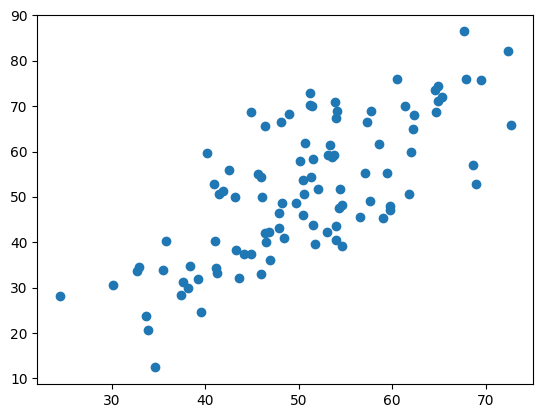

In [18]:
# データ１
plt.scatter(x1,y1)
plt.show()

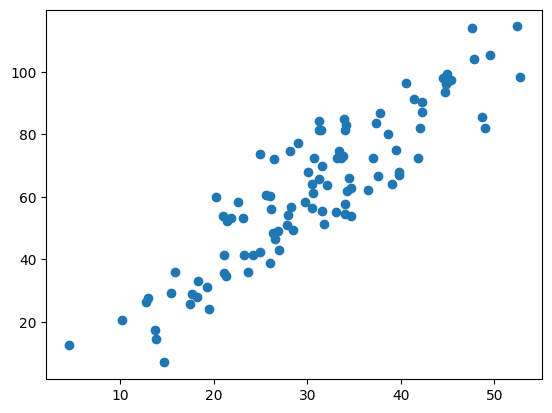

In [19]:
# データ２
plt.scatter(x2,y2)
plt.show()

###### scatterメソッドのオプション

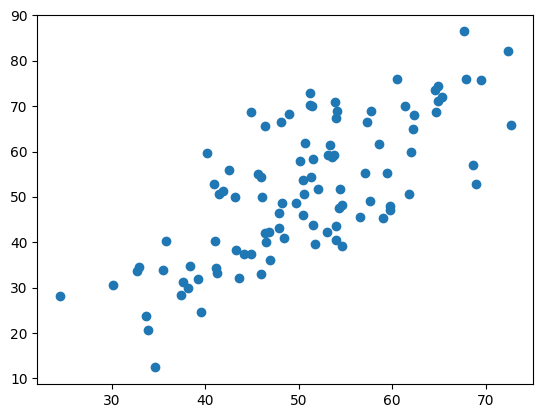

In [20]:
# １つのデータ群
# 最も単純な例
plt.scatter(x1,y1)
plt.show()

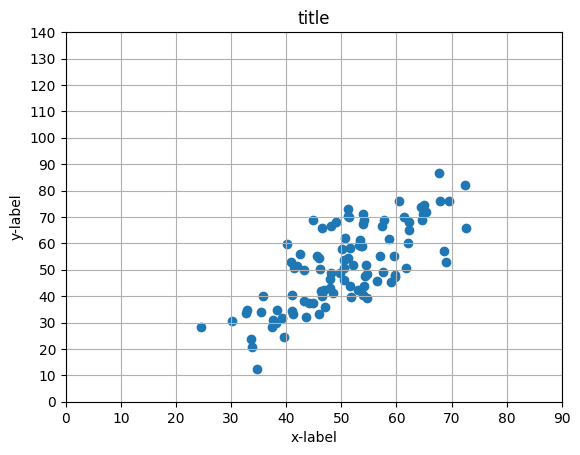

In [21]:
# １つのデータ群
# 修飾を加えた例
## データ１
plt.scatter(x1,y1)
plt.title('title') # グラフのタイトル
plt.xlabel('x-label') # x軸のラベル
plt.ylabel('y-label') # y軸のラベル
plt.xticks(np.arange(0,100,10)) # 下限,上限,間隔
plt.yticks(np.arange(0,150,10)) # 下限,上限,間隔
plt.grid() # グリッド線を表示
plt.show()

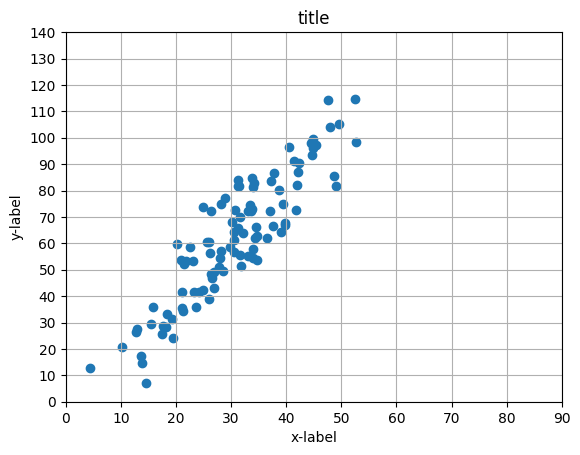

In [22]:
# １つのデータ群
# 修飾を加えた例
## データ２
plt.scatter(x2,y2)
plt.title('title') # グラフのタイトル
plt.xlabel('x-label') # x軸のラベル
plt.ylabel('y-label') # y軸のラベル
plt.xticks(np.arange(0,100,10)) # 下限,上限,間隔
plt.yticks(np.arange(0,150,10)) # 下限,上限,間隔
plt.grid() # グリッド線を表示
plt.show()

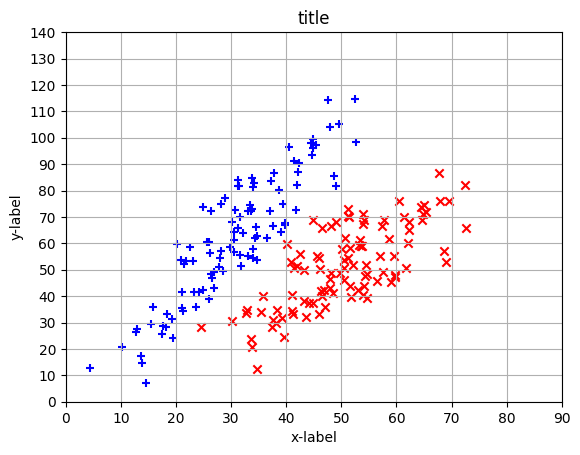

In [23]:
# ２つのデータ群
plt.scatter(x1,y1,color='red',marker='x',label='data1')
plt.scatter(x2,y2,color='blue',marker='+',label='data2')
plt.title('title') # グラフのタイトル
plt.xlabel('x-label') # x軸のラベル
plt.ylabel('y-label') # y軸のラベル
plt.xticks(np.arange(0,100,10)) # 下限,上限,間隔
plt.yticks(np.arange(0,150,10)) # 下限,上限,間隔
plt.grid() # グリッド線を表示
plt.show()

### 相関関係を把握する図

#### 散布図行列
matplotlibラッパであるseabornを使って、  
表の全ペアのヒストグラムと散布図を表示。  
（dfは数値表として初期化されたDataFrame）

##### データの生成

###### 準備
scikit-learnのデータセットを使う

In [ ]:
!pip install scikit-learn

###### 生成

In [25]:
from sklearn import datasets
iris = datasets.load_iris()
df_data = pd.DataFrame(iris.data, columns=iris.feature_names)
df_target = pd.DataFrame(iris.target, columns=['species'])
df = pd.concat([df_data, df_target], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### データの描画

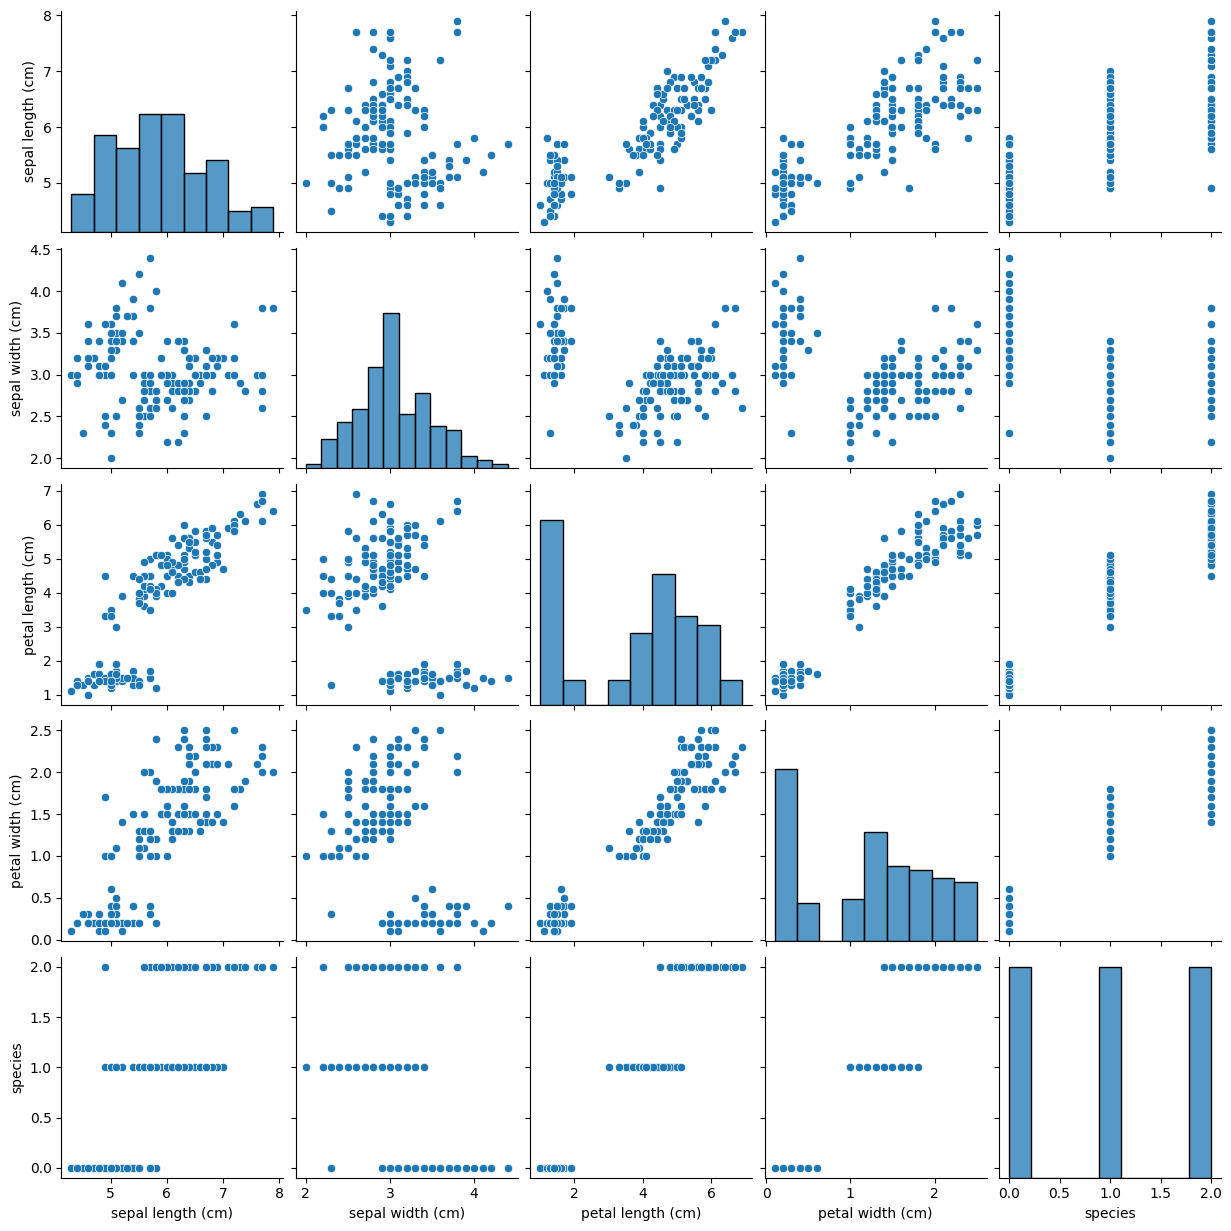

In [26]:
# 通常（回帰問題用
sns.pairplot(df)
plt.show()

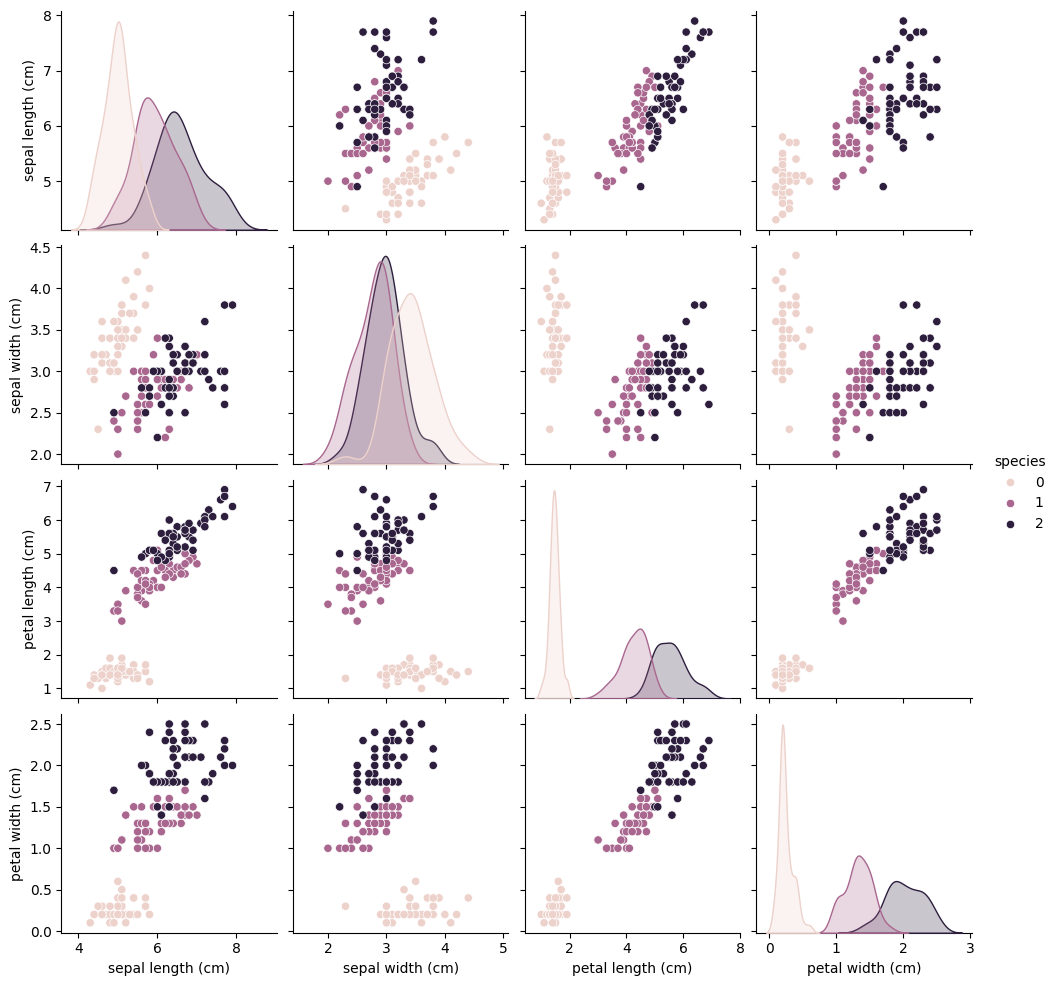

In [27]:
# 通常（分類問題用
sns.pairplot(df, hue='species')
plt.show()

#### ヒートマップ

##### データの生成

In [28]:
# 10x12 の一様乱数を生成
np.random.seed(0)
uniform_data = np.random.rand(10, 12)

##### データの描画

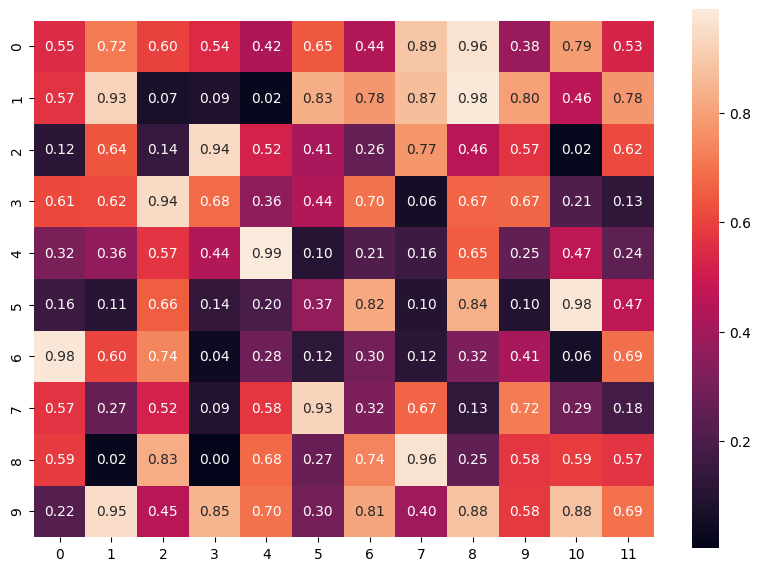

In [29]:
# 図表のサイズを指定
plt.figure(figsize=(10, 7))

# numpy.ndarray（行列）でもDataFrameでもOK
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(uniform_data, annot=True, square=True, fmt='.2f')

plt.show()

### 2次元のプロット

#### 3次関数グラフ 

##### データの生成
コチラは関数なので、式（y=x^3+x^2x+x+1）からデータを生成する感じ。

In [30]:
#x座標
x=np.arange(-10,10,0.1) # -10 - +10まで0.1刻みの配列
#x座標
y=0.01*(x**3+x**2+x+1)  # 三次関数：y=x^3+x^2x+x+1

##### データの可視化
グラフのプロット

###### 最も単純な例

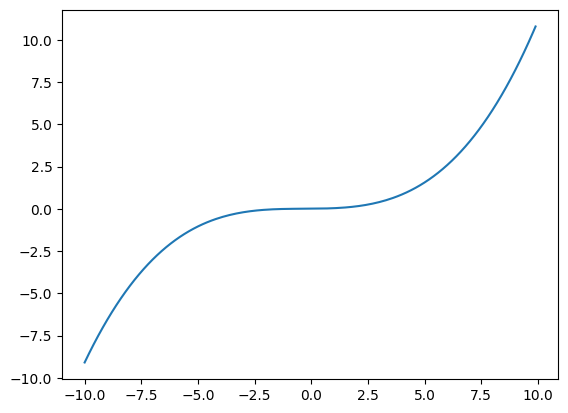

In [31]:
plt.plot(x,y)  # グラフをプロットする
plt.show()     # グラフを表示する

###### 修飾を加えた例
[前述の修飾項目](#１つのデータ群)を除く

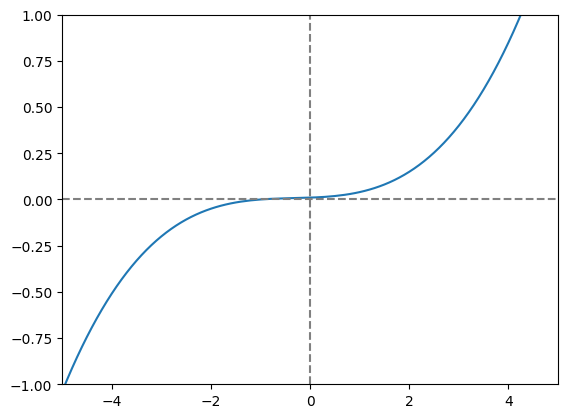

In [32]:
plt.plot(x,y) # グラフをプロットする
plt.hlines([0], -5, 5, linestyles='dashed', color='gray') # x軸に平行な直線を表示
plt.vlines([0], -1, 1, linestyles='dashed', color='gray') # y軸に平行な直線を表示
plt.xlim([-5, 5])  # x軸方向の表示範囲を指定
plt.ylim([-1, 1])  # y軸方向の表示範囲を指定
plt.show() # グラフを表示する

#### 3角関数グラフ

##### sin関数グラフ

###### データの生成
sin関数からデータを生成する。

In [33]:
#x座標
x=np.arange(0,6,0.1) # 0 - 6まで0.1刻みの配列
#y座標
y=np.sin(x)

###### データの描画

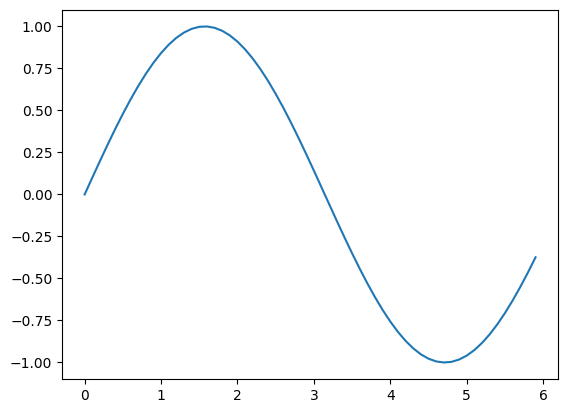

In [34]:
#グラフ描画
plt.plot(x,y)
plt.show()

##### sin, cos関数グラフ

###### データの生成

In [35]:
#x座標
x=np.arange(0,6,0.1) # 0 - 6まで0.1刻みの配列
#y座標
y1=np.sin(x)
y2=np.cos(x)

###### データの描画

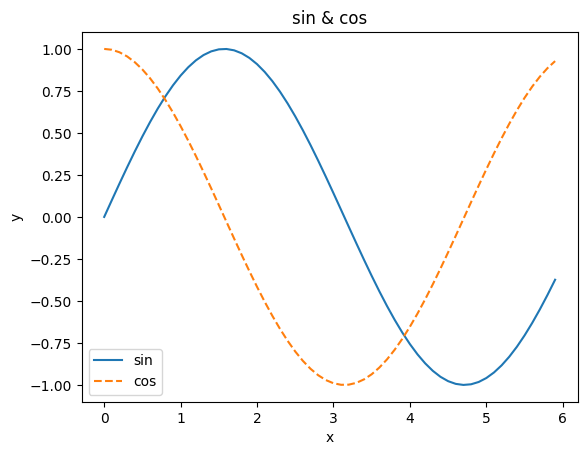

In [36]:
#グラフ描画
plt.plot(x,y1, label="sin")
plt.plot(x,y2, linestyle="--", label="cos")
plt.xlabel("x")
plt.ylabel("y")
plt.title("sin & cos")
plt.legend()
plt.show()

### 3次元のプロット

#### 準備_
インポート

In [37]:
from mpl_toolkits.mplot3d import Axes3D

#### 追加

##### 点

Text(0.5, 0, 'Z-label')

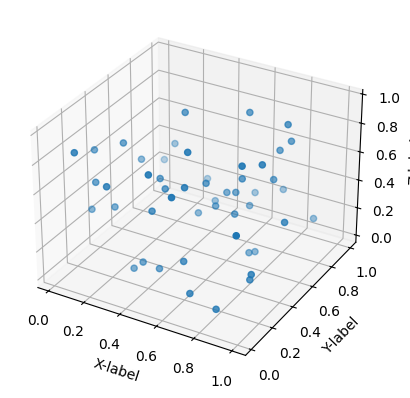

In [38]:
# (x, y, z)
x = np.random.rand(50)
y = np.random.rand(50)
z = np.random.rand(50)

# 図表の定義
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

# 3Dでプロット
ax.scatter(x, y, z)

# ラベル
ax.set_xlabel('X-label')
ax.set_ylabel('Y-label')
ax.set_zlabel('Z-label')

##### 線

###### 直線

Text(0.5, 0, 'Z-label')

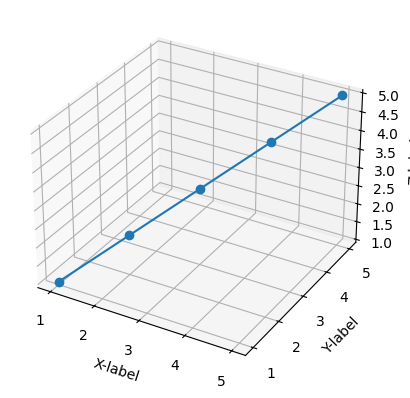

In [39]:
# (x, y, z)
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
z = [1, 2, 3, 4, 5]

# 図表の定義
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

# 3Dでプロット
ax.plot(x, y, z, "o-")

# ラベル
ax.set_xlabel('X-label')
ax.set_ylabel('Y-label')
ax.set_zlabel('Z-label')

###### 曲線

Text(0.5, 0, 'Z-label')

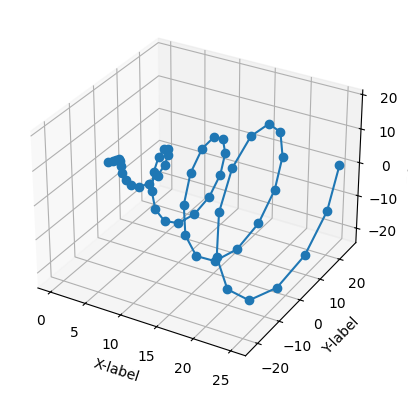

In [40]:
# (x, y, z)
x = np.linspace(0, 8 * np.pi, num=50)
y = x * np.cos(x)
z = x * np.sin(x)

# 図表の定義
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

# 3Dでプロット
ax.plot(x, y, z, "o-")

# ラベル
ax.set_xlabel('X-label')
ax.set_ylabel('Y-label')
ax.set_zlabel('Z-label')

##### 面

###### 平面

Text(0.5, 0, 'Z-label')

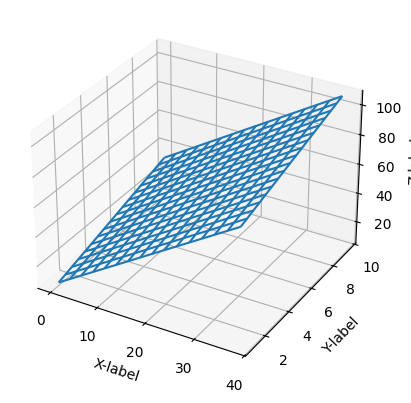

In [41]:
# (x, y, z)
# 2次元のグリッド座標
x, y = np.meshgrid(np.arange(0, 40, 2.5), np.arange(1, 10, 0.5))
# 平面の式
z = 2*x + 3*y + 4 

# 図表の定義
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

# 3Dでプロット
ax.plot_wireframe(x,y,z)

# ラベル
ax.set_xlabel('X-label')
ax.set_ylabel('Y-label')
ax.set_zlabel('Z-label')

###### 曲面

Text(0.5, 0, 'Z-label')

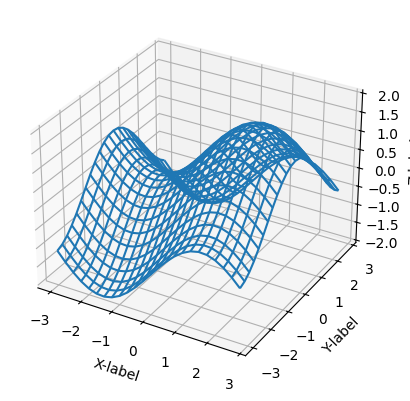

In [42]:
# (x, y, z)
# 2次元のグリッド座標
x, y = np.meshgrid(np.arange(-3, 3, 0.25), np.arange(-3, 3, 0.25))
# 曲面の式
z = np.sin(x)+ np.cos(y)

# 図表の定義
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

# 3Dでプロット
ax.plot_wireframe(x,y,z)

# ラベル
ax.set_xlabel('X-label')
ax.set_ylabel('Y-label')
ax.set_zlabel('Z-label')